In [1]:
import  numpy

In [57]:
class LinearLayer:
    '''A linear dense layer for a neural network.'''

    def __init__(self, input_size, output_size):
        '''Initialize the layer with random weights and biases.'''
        self.input_size = input_size
        self.output_size = output_size
        self.weights = numpy.random.randn(output_size, input_size)
        self.biases = numpy.random.randn(output_size)

    def forward(self, inputs):
        '''Forward pass through the layer.'''
        self.inputs = inputs
        return numpy.matmul(self.weights, inputs) + self.biases
    
    def backward(self, gradients):
        '''Backward pass through the layer.'''
        self.weight_gradients = numpy.outer(gradients, self.inputs)
        self.bias_gradients = gradients
        self.input_gradients = numpy.matmul(self.weights.T, gradients)
        return self.input_gradients
    
    def update(self, learning_rate):
        '''Update the weights and biases of the layer.'''
        self.weights -= learning_rate * self.weight_gradients
        self.biases -= learning_rate * self.bias_gradients
    


class ReluLayer:
    '''A ReLU activation layer for a neural network.'''

    def forward(self, inputs):
        '''Forward pass through the layer.'''
        self.inputs = inputs
        return numpy.maximum(0, inputs)

    def backward(self, gradients):
        '''Backward pass through the layer.'''
        return gradients * (self.inputs > 0)
    
    def update(self, learning_rate):
        '''No update needed for ReLU activation layer.'''
        pass
    

    
    

In [ ]:
# a neural network 

class NeuralNetwork:

    def __init__(self, layers):
        '''Initialize the network with a list of layers.'''
        self.layers = layers    

    def forward(self, inputs):
        '''Forward pass through the
        network.'''
        for layer in self.layers:
            inputs = layer.forward(inputs)
        return inputs
    
    def backward(self, gradients):
        '''Backward pass through the
        network.'''
        for layer in reversed(self.layers):
            gradients = layer.backward(gradients)
        return gradients
    
    def update(self, learning_rate):
        '''Update the weights and biases of the network.'''
        for layer in self.layers:
            layer.update(learning_rate)

        

In [58]:
# A test for the forward pass
layer = LinearLayer(3, 2)
inputs = numpy.array([1, 2, 3])
outputs = layer.forward(inputs)
print(outputs)

[-1.6686057  -2.45254124]


In [59]:
# Test the relu layer
inputs = numpy.array([-1, 0, 1])
relu = ReluLayer()
outputs = relu.forward(inputs)
print(outputs)



[0 0 1]


In [49]:
def target_function(inputs):
    '''The target function for the test.'''
    matrix = numpy.array([[-2, 5, -1.5], [3, -1, 2]])
    bias = numpy.array([-2, 1])
    return numpy.matmul(matrix, inputs) + bias

def target_function2(inputs):
    '''The target function for the test.'''
    matrix = numpy.array([[2]])
    bias = numpy.array([1])
    return numpy.matmul(matrix, inputs) + bias


In [13]:
def mse_loss(predictions, targets):
    '''Mean squared error loss function.'''
    return numpy.mean((predictions - targets) ** 2)

def mse_loss_gradient(predictions, targets):
    '''Gradient of the mean squared error loss function.'''
    return 2 * (predictions - targets) / targets.size

In [29]:
random_inputs = numpy.random.randn(3)
targets = target_function(random_inputs)
predictions = layer.forward(random_inputs)
loss = mse_loss(predictions, targets)
print(loss)
gradients = mse_loss_gradient(predictions, targets)
print(gradients)


258.46960618437566
[ -6.69441377 -21.72841542]


In [30]:
layer.backward(gradients)

print(layer.weight_gradients)
print(layer.bias_gradients)
print(layer.input_gradients)

[[ -2.37873117 -13.25597232  -5.17284706]
 [ -7.72077449 -43.02561555 -16.78978527]]
[ -6.69441377 -21.72841542]
[31.03659139 11.97990851  7.07195603]


In [31]:
# update the weights and biases
learning_rate = 0.001
layer.weights -= learning_rate * layer.weight_gradients
layer.biases -= learning_rate * layer.bias_gradients


In [32]:
# Recheck the loss
predictions = layer.forward(random_inputs)
loss = mse_loss(predictions, targets)
print(loss)

5575.194020304282


In [54]:
# run a simulation

# create a validation inputs with 100 samples
validation_input = numpy.random.randn(100, 1)
validation_targets = [target_function2(i) for i in validation_input]

# create training data
training_input = numpy.random.randn(1000, 1)
training_targets = [target_function2(i) for i in training_input]

# Create a linear layer
layer = LinearLayer(1, 1)

learning_rate = 0.0001

# Train the layer for 1000 epochs
for epoch in range(100):
    for inputs, targets in zip(training_input, training_targets):
        predictions = layer.forward(inputs)
        loss = mse_loss(predictions, targets)
        gradients = mse_loss_gradient(predictions, targets)
        layer.backward(gradients)
        layer.weights -= learning_rate * layer.weight_gradients
        layer.biases -= learning_rate * layer.bias_gradients
    print(f'Epoch {epoch}, loss {loss}')

# Validate the model
validation_predictions = [layer.forward(i) for i in validation_input]
validation_loss = mse_loss(numpy.array(validation_predictions), numpy.array(validation_targets))
print(f'Validation loss: {validation_loss}')



Epoch 0, loss 13.292167519795743
Epoch 1, loss 8.870831246260037
Epoch 2, loss 5.920206418263552
Epoch 3, loss 3.951058434904286
Epoch 4, loss 2.636903153064999
Epoch 5, loss 1.759863897046754
Epoch 6, loss 1.1745410861578751
Epoch 7, loss 0.7839017374433622
Epoch 8, loss 0.5231899314340434
Epoch 9, loss 0.34918977640562393
Epoch 10, loss 0.23306019723805724
Epoch 11, loss 0.15555329073838667
Epoch 12, loss 0.10382330678224612
Epoch 13, loss 0.06929711101564455
Epoch 14, loss 0.04625301826257158
Epoch 15, loss 0.030872355200541653
Epoch 16, loss 0.020606500396019207
Epoch 17, loss 0.013754461015095889
Epoch 18, loss 0.009180954355969571
Epoch 19, loss 0.006128258244881912
Epoch 20, loss 0.004090640642780727
Epoch 21, loss 0.0027305535866619583
Epoch 22, loss 0.0018227002237851905
Epoch 23, loss 0.0012167042432393894
Epoch 24, loss 0.0008121945979884407
Epoch 25, loss 0.0005421763068897534
Epoch 26, loss 0.0003619315183328732
Epoch 27, loss 0.00024161159566712283
Epoch 28, loss 0.000161

In [55]:
print(layer.weights)
print(layer.biases)


[[1.99999999]]
[1.]


Matplotlib is building the font cache; this may take a moment.


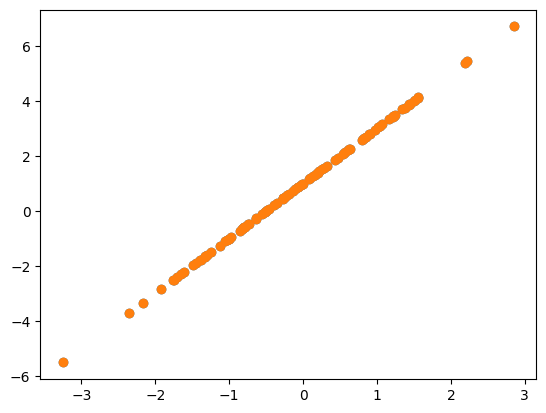

In [53]:
# Plot the validation data
import matplotlib.pyplot as plt
plt.scatter(validation_input, validation_targets)
plt.scatter(validation_input, validation_predictions)
plt.show()
